In [308]:
# Importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import joblib
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import  StandardScaler
from sklearn.model_selection import train_test_split
import warnings

# Suppress specific warnings
warnings.filterwarnings("ignore", message="Skipping features without any observed values")


In [310]:
data = pd.read_csv('tested.csv')  # Update the path if necessary
print(data.head(10))


   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   
5          897         0       3   
6          898         1       3   
7          899         0       2   
8          900         1       3   
9          901         0       3   

                                           Name     Sex   Age  SibSp  Parch  \
0                              Kelly, Mr. James    male  34.5      0      0   
1              Wilkes, Mrs. James (Ellen Needs)  female  47.0      1      0   
2                     Myles, Mr. Thomas Francis    male  62.0      0      0   
3                              Wirz, Mr. Albert    male  27.0      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)  female  22.0      1      1   
5                    Svensson, Mr. Johan Cervin    male  14.0      0      0   
6                          Connolly, Miss. Kate  f

In [312]:
#Getting the basic info
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [314]:
#Removing the null values
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [316]:
#as we see there are null values in the age,fare and the cabin column

data['Age'] = data['Age'].fillna(data['Age'].mean())
data['Cabin'] = data['Cabin'].fillna('Unknown')
data['Fare'] = data['Fare'].fillna(0)


In [318]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [320]:
#We are good to go as the null values are removed

In [322]:
#Replacing thr gender values with 1-Female and 0-Male
data['Sex'].value_counts()# this proves only males and females are present 

Sex
male      266
female    152
Name: count, dtype: int64

In [324]:
data['Sex'] = data['Sex'].map({'male': 0, 'female': 1})
data['Embarked'] = data['Embarked'].map({'C': 0, 'Q': 1, 'S': 2})

In [326]:
print(data)


     PassengerId  Survived  Pclass  \
0            892         0       3   
1            893         1       3   
2            894         0       2   
3            895         0       3   
4            896         1       3   
..           ...       ...     ...   
413         1305         0       3   
414         1306         1       1   
415         1307         0       3   
416         1308         0       3   
417         1309         0       3   

                                             Name  Sex       Age  SibSp  \
0                                Kelly, Mr. James    0  34.50000      0   
1                Wilkes, Mrs. James (Ellen Needs)    1  47.00000      1   
2                       Myles, Mr. Thomas Francis    0  62.00000      0   
3                                Wirz, Mr. Albert    0  27.00000      0   
4    Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1  22.00000      1   
..                                            ...  ...       ...    ...   
413               

In [328]:
# Selecting the columns to standardize
features_to_standardize = ['Age', 'Fare']

# Initialize StandardScaler
scaler = StandardScaler()

# Apply the scaler to the selected features
data[features_to_standardize] = scaler.fit_transform(data[features_to_standardize])

# Check the result
print(data.head())

   PassengerId  Survived  Pclass  \
0          892         0       3   
1          893         1       3   
2          894         0       2   
3          895         0       3   
4          896         1       3   

                                           Name  Sex       Age  SibSp  Parch  \
0                              Kelly, Mr. James    0  0.334993      0      0   
1              Wilkes, Mrs. James (Ellen Needs)    1  1.325530      1      0   
2                     Myles, Mr. Thomas Francis    0  2.514175      0      0   
3                              Wirz, Mr. Albert    0 -0.259330      0      0   
4  Hirvonen, Mrs. Alexander (Helga E Lindqvist)    1 -0.655545      1      1   

    Ticket      Fare    Cabin  Embarked  
0   330911 -0.496637  Unknown         1  
1   363272 -0.511497  Unknown         2  
2   240276 -0.463335  Unknown         1  
3   315154 -0.481704  Unknown         2  
4  3101298 -0.416740  Unknown         2  


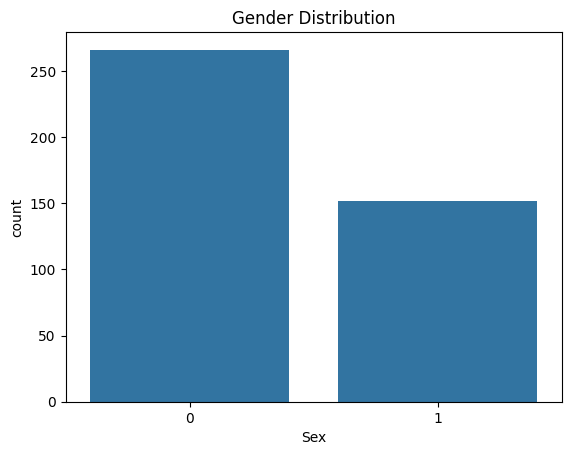

In [330]:
#Some data plots to visualize
sns.countplot(x='Sex', data=data)
plt.title('Gender Distribution')
plt.show()


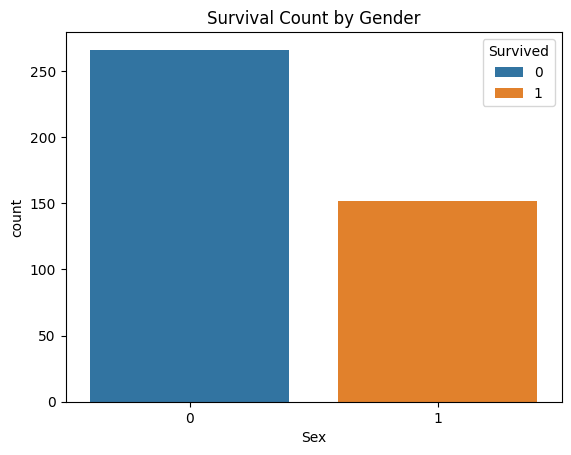

In [332]:
# Countplot for survival by gender
sns.countplot(x='Sex', hue='Survived', data=data)
plt.title('Survival Count by Gender')
plt.show()


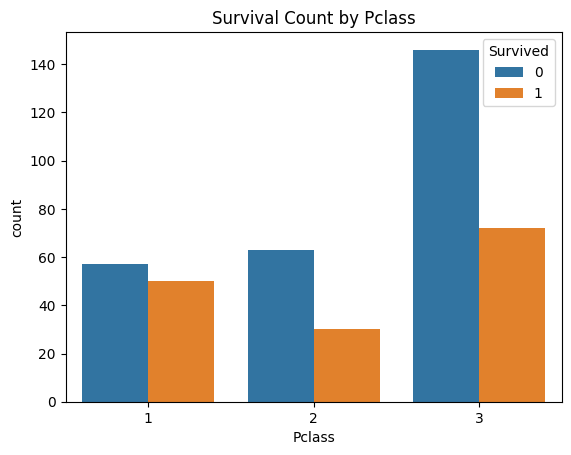

In [334]:
# Countplot for survival by Pclass
sns.countplot(x='Pclass', hue='Survived', data=data)
plt.title('Survival Count by Pclass')
plt.show()


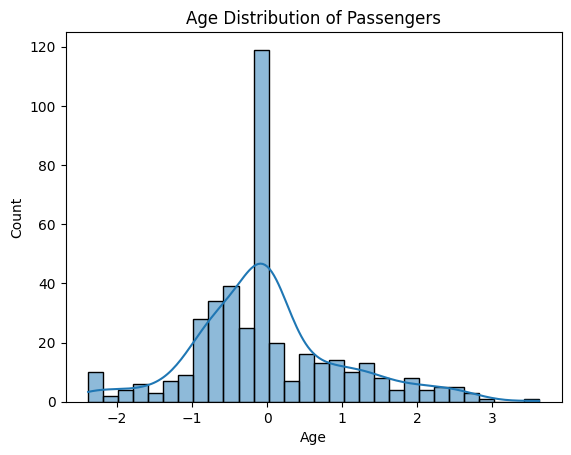

In [336]:
# Histogram for Age distribution
sns.histplot(data['Age'], kde=True, bins=30)
plt.title('Age Distribution of Passengers')
plt.show()


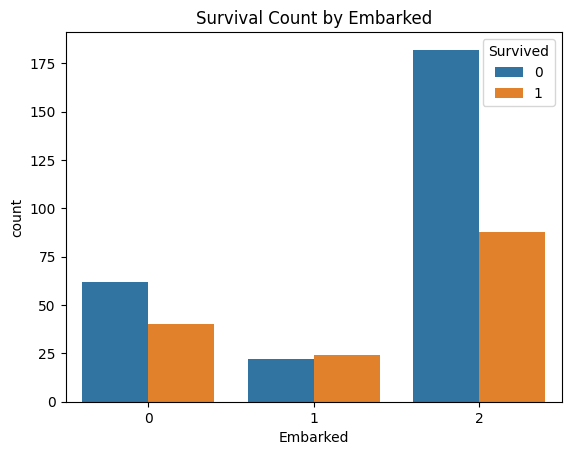

In [337]:
# Countplot for survival by Embarked
sns.countplot(x='Embarked', hue='Survived', data=data)
plt.title('Survival Count by Embarked')
plt.show()


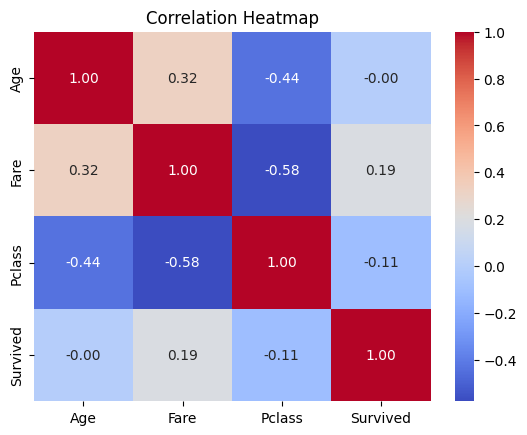

In [340]:
# Correlation heatmap
correlation = data[['Age', 'Fare', 'Pclass', 'Survived']].corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


In [342]:
#Defining the Inputs and the Output 
X=data.drop('Survived',axis=1)
X = X.drop(['Name', 'Cabin','Ticket'], axis=1)
Y=data['Survived']

In [344]:
print(X,Y)

     PassengerId  Pclass  Sex       Age  SibSp  Parch      Fare  Embarked
0            892       3    0  0.334993      0      0 -0.496637         1
1            893       3    1  1.325530      1      0 -0.511497         2
2            894       2    0  2.514175      0      0 -0.463335         1
3            895       3    0 -0.259330      0      0 -0.481704         2
4            896       3    1 -0.655545      1      1 -0.416740         2
..           ...     ...  ...       ...    ...    ...       ...       ...
413         1305       3    0  0.000000      0      0 -0.492680         2
414         1306       1    1  0.691586      0      0  1.314641         0
415         1307       3    0  0.651965      0      0 -0.507017         2
416         1308       3    0  0.000000      0      0 -0.492680         2
417         1309       3    0  0.000000      1      1 -0.236263         0

[418 rows x 8 columns] 0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    

In [346]:
# Splitting the Dataset into training and testing data set
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)

In [348]:
from sklearn.impute import SimpleImputer
#we couldnt handle the data's null values very well hence we are using the Immputer
# Create an imputer object with a chosen strategy (mean, median, most_frequent)
imputer = SimpleImputer(strategy='most_frequent')

# Apply the imputer to your training and test sets
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

# Now, fit your model with the imputed data
model = LogisticRegression(max_iter=500)
model.fit(X_train_imputed, Y_train)

# Predict and compute the accuracy score
Y_pred = model.predict(X_test_imputed)
score = accuracy_score(Y_test, Y_pred)
print(f"The accuracy score is {score * 100:.2f}%")


The accuracy score is 100.00%


In [350]:
joblib.dump(model,'deployed_model.pkl')

['deployed_model.pkl']

In [352]:
#The End 